In [1]:
import os
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


import jieba
jieba.set_dictionary('dict.txt.big')
with open('stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 
from string import punctuation
stops.extend(punctuation)
stops.extend(['\n', ' ', '使用', '一個'])

from collections import Counter
from wordcloud import WordCloud


In [2]:
files = os.listdir('articles')
files = [os.path.join('articles', f) for f in files]
df = pd.read_csv(files[-1])

In [3]:
len(df)

1990

# Rank

In [4]:
df.head(3)

article_url                group  \
0  https://ithelp.ithome.com.tw/articles/10193118  SoftwareDevelopment   
1  https://ithelp.ithome.com.tw/articles/10193145                自我挑戰組   
2  https://ithelp.ithome.com.tw/articles/10193179                自我挑戰組   

   like_count           corpus_title  corpus_day  \
0           0  AndroidArchitecture系列           3   
1           0             菜鳥工程師初體驗系列           4   
2           0       M157q的待業程式生活日誌系列           3   

                                       article_title writer_name  \
0                   ArchitectureComponents-ViewModel        Ivan   
1                                           我說那個文件呢？       YChia   
2  [2018iThome鐵人賽]Day3:用Python寫個程式抓出今年我在Twitter上存...       M157q   

                                          writer_url     publish_datetime  \
0  https://ithelp.ithome.com.tw/users/20103849/ir...  1513987088000000000   
1  https://ithelp.ithome.com.tw/users/20106219/ir...  1513987056000000000   
2  https://ithelp.ithome.com.tw/users/20107813/ir...  1513987028000000000   

   browse_count                                       text_content   h1  \
0            11  昨天我們建好的基本MVVM架構，其中帶有一個lifecycle的問題，當我們旋轉螢幕時：\n...  NaN   
1             5  不好意思 請問有文件嗎？\n摸索完後台的主要功能後，跟主管要了之前遺留下來的文件看看\n使用...  NaN   
2             4  （本文章使用敏捷部落格發文方法，內容採用「提前發佈、時常更新」策略，陸續新增中。）\n身為一...  NaN   

                   h2                                                 h3   h4  \
0                 NaN  ['Lifecycle-aware ViewModel', 'Context', 'View...  NaN   
1                 NaN                                                NaN  NaN   
2  ['前言', '步驟', '結果']                                                NaN  NaN   

    h5   h6         crawled_date  
0  NaN  NaN  1513987677796698000  
1  NaN  NaN  1513987677796698000  
2  NaN  NaN  1513987677796698000

In [35]:
def lenth_counter(content):
    if pd.notnull(content):
        return len(content)
    else:
        return 0
# df['article_length'] = df['text_content'].apply(lenth_counter)
# df_group_length = df.groupby(['group', 'writer_name']).mean()[['article_length']]
# df_group_other = df.groupby(['group', 'writer_name']).first()[['corpus_title', 'writer_url']]
# df_group_length.join(df_group_other).sort_values('article_length', ascending=False)


for g in sorted(list(set(df['group']))):
    df_group = df.loc[df['group'] == g]
    df_group['article_length'] = df_group['text_content'].apply(lenth_counter)
    df_group_length = df_group.groupby(['writer_name']).mean()[['article_length']]
    df_group_other = df_group.groupby(['writer_name']).first()[['group', 'corpus_title', 'writer_url']]
    print(g)
    print(df_group_length.join(df_group_other).sort_values('article_length', ascending=False)[:3].to_csv())

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AI&MachineLearning
writer_name,article_length,group,corpus_title,writer_url
IcodesoIam.,1917.3333333333333,AI&MachineLearning,以100張圖理解NeuralNetwork--觀念與實踐系列,https://ithelp.ithome.com.tw/users/20001976/ironman
shortid,1426.25,AI&MachineLearning,機器學習你也可以-文組帶你手把手實做機器學習聖經系列,https://ithelp.ithome.com.tw/users/20107850/ironman
DuranHsieh,970.421052631579,AI&MachineLearning,利用MSBotframework與CognitiveService建構自用智慧小秘書系列,https://ithelp.ithome.com.tw/users/20091494/ironman

DataTechnology
writer_name,article_length,group,corpus_title,writer_url
AlanTsai,2384.5,DataTechnology,DataScience到底是什麼-從一個完全外行角度來看系列,https://ithelp.ithome.com.tw/users/20083151/ironman
arksu,2224.3333333333335,DataTechnology,MicrosoftRSolution系列,https://ithelp.ithome.com.tw/users/20103333/ironman
bymiachang,1699.25,DataTechnology,DataSciencewithAzure系列,https://ithelp.ithome.com.tw/users/20103632/ironman

DevOps
writer_name,article_length,group,corpus_title,writer_url
帥哥,1715.857142857143,DevOps,Openstack學習與介紹系列,https://ithelp

In [36]:
# df_group_likecount = df.groupby(['group', 'writer_name']).mean()[['like_count']]
# df_group_other = df.groupby(['group', 'writer_name']).first()[['corpus_title', 'writer_url']]
# df_group_likecount.join(df_group_other).sort_values(['like_count'], ascending=False)

for g in sorted(list(set(df['group']))):
    df_group = df.loc[df['group'] == g]
    df_group_likecount = df_group.groupby(['writer_name']).mean()[['like_count']]
    df_group_other = df_group.groupby(['writer_name']).first()[['group', 'corpus_title', 'writer_url']]
    print(df_group_likecount.join(df_group_other).sort_values(['like_count'], ascending=False)[:3].to_csv())

writer_name,like_count,group,corpus_title,writer_url
IcodesoIam.,1.6666666666666667,AI&MachineLearning,以100張圖理解NeuralNetwork--觀念與實踐系列,https://ithelp.ithome.com.tw/users/20001976/ironman
GoatWang,0.5882352941176471,AI&MachineLearning,玩轉資料與機器學習-以自然語言處理為例系列,https://ithelp.ithome.com.tw/users/20107576/ironman
shortid,0.5,AI&MachineLearning,機器學習你也可以-文組帶你手把手實做機器學習聖經系列,https://ithelp.ithome.com.tw/users/20107850/ironman

writer_name,like_count,group,corpus_title,writer_url
plusone,1.0,DataTechnology,使用Python進行資料分析系列,https://ithelp.ithome.com.tw/users/20107514/ironman
JasonKuan(CapillaryJ),0.8,DataTechnology,你都在公司都在幹啥R？R語言資料分析經驗分享系列,https://ithelp.ithome.com.tw/users/20107299/ironman
polo,0.5,DataTechnology,GraphQL+ApolloData入門系列,https://ithelp.ithome.com.tw/users/20103438/ironman

writer_name,like_count,group,corpus_title,writer_url
blackie1019,2.3333333333333335,DevOps,AmazonCloudService30dayschallenge系列,https://ithelp.ithome.com.tw/users/20083507/ironman
zxcvbnius,1.3333333333333333,DevOps,

In [38]:
# df_group_browsecount = df.groupby(['group', 'writer_name']).mean()[['browse_count']]
# df_group_other = df.groupby(['group', 'writer_name']).first()[['corpus_title', 'writer_url']]
# df_group_browsecount.join(df_group_other).sort_values(['browse_count'], ascending=False)


for g in sorted(list(set(df['group']))):
    df_group = df.loc[df['group'] == g]
    df_group_browsecount = df_group.groupby(['writer_name']).mean()[['browse_count']]
    df_group_other = df_group.groupby(['writer_name']).first()[['group', 'corpus_title', 'writer_url']]
    print(df_group_browsecount.join(df_group_other).sort_values(['browse_count'], ascending=False)[:3].to_csv())


writer_name,browse_count,group,corpus_title,writer_url
Bonny,648.75,AI&MachineLearning,讓我們一起來見見歐美語音助理界的當紅炸子雞-Alexa吧!系列,https://ithelp.ithome.com.tw/users/20107290/ironman
GoatWang,549.8823529411765,AI&MachineLearning,玩轉資料與機器學習-以自然語言處理為例系列,https://ithelp.ithome.com.tw/users/20107576/ironman
DuranHsieh,512.8421052631579,AI&MachineLearning,利用MSBotframework與CognitiveService建構自用智慧小秘書系列,https://ithelp.ithome.com.tw/users/20091494/ironman

writer_name,browse_count,group,corpus_title,writer_url
Bonny,601.0,DataTechnology,Python學習筆記系列,https://ithelp.ithome.com.tw/users/20107290/ironman
Wolke,570.8181818181819,DataTechnology,MicrosoftBotFramework30天上手系列,https://ithelp.ithome.com.tw/users/20046160/ironman
stana,509.1578947368421,DataTechnology,"Hadoopecosystem工具簡介,安裝教學與各種情境使用系列",https://ithelp.ithome.com.tw/users/20107349/ironman

writer_name,browse_count,group,corpus_title,writer_url
cythilya,2663.25,DevOps,Nightwatch101：使用Nightwatch實現End-to-EndTesting系列,https://ithelp.ithome.com.tw/users/200922

# Group Diff

In [10]:
def tokenize(sentence):
    terms = []
    if pd.notnull(sentence):
        for term in jieba.cut(sentence):
            term = term.lower()
            if term not in stops:
                terms.append(term)
    return terms

df_content = df[['text_content']] 
df_content['processed'] = df_content['text_content'].apply(tokenize)
df_content

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


text_content  \
0     昨天我們建好的基本MVVM架構，其中帶有一個lifecycle的問題，當我們旋轉螢幕時：\n...   
1     不好意思 請問有文件嗎？\n摸索完後台的主要功能後，跟主管要了之前遺留下來的文件看看\n使用...   
2     （本文章使用敏捷部落格發文方法，內容採用「提前發佈、時常更新」策略，陸續新增中。）\n身為一...   
3     我們需要一個免費的照片來源，Unsplash 這個圖庫網站有提供，只要去 Unslpash ...   
4     什麼是KeywordSearch 1.0 爬蟲關鍵字報表工具？\n是作者近期兩周實作出來的小...   
5     2017/09/26 CPE\n考題連結:https://cpe.cse.nsysu.edu...   
6     Three.js是一套使用JavaScript撰寫的三維繪圖函式庫，它採用了WebGL作為繪...   
7     今天要提的是多重返回值，在 Go 裡面，一個函式可以返回多個值；須注意的是當此函式被調用時，...   
8     還記得我們上一篇 初探 Web 的世界, 提到的通訊協定，在網路的世界也是一樣，我們連結到對...   
9     python可以使用lambda expression宣告匿名函式，但目前還不清楚在甚麼樣的...   
10                                             ---待續---   
11    Keystone 提供 OpenStack 身份驗證的的服務，它提供了以下功能：\nOpen...   
12    最近在加裝新的compute node上去，遇到了一些問題。尚未解決。\nNeutron 簡...   
13    就在第一次嘗試寫 Unit Test 之後，便對它有了很好的第一印象，雖然對它還是一知半解，...   
14    本文同步刊載於作者部落格：https://medium.com/@shengyou/2018...   
15    本日承襲自昨日的文章，所以直接從「作法」的章節繼續講述。\n本文還在更新中，預計會寫到「實際...   
16                                               很可恥的暫存   
17                                                 待寫..   
18                                               先暫位，待補   
19    今天來介紹一下Tomcat\n首先要下載Tomcat，Google搜尋就可以找到了，找適合自...   
20    如同前一天所說\n想要用cloudeflare來製作設定webhook的回呼網址\n一直到現...   
21    今天來介紹另一個在台灣非常重要的CERT組織，國家電腦事件處理中心（Taiwan Natio...   
22    FB event: https://www.facebook.com/events/1911...   
23    上一篇所用到的程式碼來回顧一下\n當我們讀取到prs等於work order內容之後，會包含...   
24    前面的文章裏，我們已經知道Antlr可以解析簡單的程式碼，並生成文法樹。\n它的流程是\n\...   
25    快取的歷史悠久\n如果要從CPU開始講一定會跑題XD\n所以先把範圍限縮在網頁會用到的就好\...   
26    在上一篇文章中我們創建 Meteor 的專案，並設定好資料夾結構，這篇文章會開始安裝 Rea...   
27    Sealed Classes用來限制類別的繼承關係 這表示Sealed Classes能繼承...   
28    筆者OS: 看來今天還是來不及完稿，還是要持續待補完, 明後天要好好來趕一下文章\n前兩天的...   
29    \n前情提要：從[03][Machine Learning - 推薦系統] 怎麼使用模型最上...   
...                                                 ...   
1960  最近在Udemy買了一門課程: The Python Workbook: Solve 100...   
1961  Hello, 我是牛哥！\n偶而客串回文，擾亂你的挨踢人生。\n呃~不抄下去了~\n怕小生吉...   
1962  哈囉，我是米荳(Mido)\n2017/06 離開大學溫暖的懷抱\n2017/08 開始學習...   
1963  今年是我第一次參加鐵人賽。我想藉由這次活動把我今年的轉變紀錄起來。 今年一開始的時候我其實不...   
1964  這一系列，是以一個相當有歷史典故的程式語言家族為主角，從它的故事，到語言特性，到實務應用。每...   
1965  最近加入一個Udemy的線上課程，課程名稱叫做"Complete Python Bootca...   
1966  人往往在敘述問題時，會用自已當下所見聞的來反應問題。\n你以為、我以為，2者有可能是不一樣的...   
1967  大家好，我是Kiang是一個菜鳥新鮮人，\n為什麼我會接觸到這個delphi語言呢?\n這是...   
1968  JavaScript，一種高階程式語言，通過解釋執行，是一門動態型別，物件導向（基於原型）的...   
1969  寫了 Javascript 一段時間\nNodejs 與 Javascript 前後端之亂\...   
1970  第一篇好像大家都會寫寫緣起、總綱之類的介紹，那我也來寫一下好了。\n其實我想介紹的主題一點都...   
1971  作為三十天鐵人挑戰賽的第一篇，我想先說明一下系列選題的緣起。標題中除了前三種常見熱門框架之外...   
1972  歡迎各位來到語音機器人的世界~\n我今天要跟大家介紹的是亞馬遜的Echo這個語音助理\n這個...   
1973  本來只是想訂閱RSS\n後來覺得RSS沒有每天看\n數字就會一直長上去 然後就懶得看了\n所...   
1974  時間過得很快，又到了一年一度的 IT 鐵人賽，這一次要寫的題目是在這 30 天內介紹和使用D...   
1975  先簡單自我介紹一下\n英文名 Sam 主要都是寫 Java,志願就是想打造一個世界級的產品,...   
1976  我是Ellen，喜歡設計畫面的前端工程師。\n目前仍在學習中！\n想要筆記一些工作或是學習的...   
1977  在還沒開始之前有些稍微找了一些 scala 的資料．scala 基本的核心概念或許就是名字的...   
1978  科技始終來自於惰性，因為想要偷懶，希望能把麻煩事一次解決，所以自動化一直是我很感興趣的題目。...   
1979                在網頁上連接的預設樣式為藍色，且有下劃線。\n改變此預設的樣式之範例：   
1980  介紹\n在設定一個 React 專案時候，通常會使用 create-React-app 這個...   
1981  基於 Google 2003 年發表了 MapReduce 與 GFS(Google Fil...   
1982  在很久以前, 曾經人們大量的使用table來排版, 但table 帶來的巨大的限制, 我們沒...   
1983  首先，針對於公司內部資通安全之稽核，本人以行政院所公布『行政院資通安全稽核服務團』所提供的『...   
1984  感測器是一種檢測裝置，能感受到被測量的信息，並能將感受到的信息，按一定規律變換成信號或其他所...   
1985  前端工程在過去這幾年變化快的驚人，JavaScript 從原先在頁面上只負責簡單的介面互動操...   
1986  明年2月就是我進資訊業的第二年了....\n說實在Web這一塊在近兩年來的變化真的很多！ \...   
1987  首先先設定桌面板的logo和選單並排排版，之後在再新增響應式網頁斷點，讓使用者可在其他裝置觀...   
1988  ** 關於Allenjung**\nAllen的異國料理奇遇記\n參賽的勇氣\n因為看過所有...   
1989  因為 所以\n系列文章請改到這裡來喔!\nMicrosoft Bot Framework 3...   

                                              processed  
0     [昨天, 建好, mvvm, 架構, 帶有, lifecycle, 問題, 旋轉, 螢幕, ...  
1     [不好意思, 請問, 文件, 摸索, 完後台, 主要, 功能, 後, 主管, 之前, 遺留下...  
2     [文章, 敏捷, 部落, 格, 發文, 方法, 內容, 採用, 提前, 發佈, 時常, 更新...  
3     [需要, 免費, 照片, 來源, unsplash, 圖庫, 網站, 提供, unslpas...  
4     [keywordsearch, 1.0, 爬蟲, 關鍵字, 報表, 工具, 作者, 近期, ...  
5     [2017, 09, 26, cpe, 考題, 連結, ht

In [11]:
total_terms = []
for terms in df_content['processed']:
    total_terms.extend(terms)
sorted(dict(Counter(total_terms)).items(), key=lambda x:x[1], reverse=True)

[('中', 2415),
 ('資料', 2037),
 ('做', 1906),
 ('後', 1655),
 ('需要', 1646),
 ('程式', 1616),
 ('時', 1513),
 ('寫', 1449),
 ('執行', 1410),
 ('好', 1373),
 ('設定', 1350),
 ('方式', 1242),
 ('介紹', 1238),
 ('問題', 1142),
 ('安裝', 1136),
 ('再', 1132),
 ('物件', 1126),
 ('透過', 1123),
 ('變數', 1089),
 ('功能', 1053),
 ('先', 1027),
 ('方法', 1024),
 ('檔案', 987),
 ('程式碼', 978),
 ('開發', 963),
 ('js', 959),
 ('下', 958),
 ('比較', 948),
 ('直接', 932),
 ('看到', 920),
 ('人', 917),
 ('之後', 909),
 ('一下', 900),
 ('簡單', 895),
 ('一些', 881),
 ('內容', 877),
 ('時間', 854),
 ('今天', 852),
 ('元素', 849),
 ('https', 836),
 ('javascript', 833),
 ('建立', 827),
 ('說', 819),
 ('專案', 818),
 ('知道', 806),
 ('網頁', 801),
 ('提供', 777),
 ('測試', 775),
 ('資訊', 774),
 ('文章', 769),
 ('函式', 767),
 ('已經', 764),
 ('屬性', 761),
 ('想', 748),
 ('值', 747),
 ('範例', 738),
 ('學習', 736),
 ('最', 731),
 ('參數', 728),
 ('語言', 727),
 ('css', 716),
 ('裡面', 704),
 ('部分', 703),
 ('應該', 691),
 ('指令', 687),
 ('目前', 683),
 ('html', 682),
 ('工具', 682),
 ('環境', 675),
 ('以下', 667

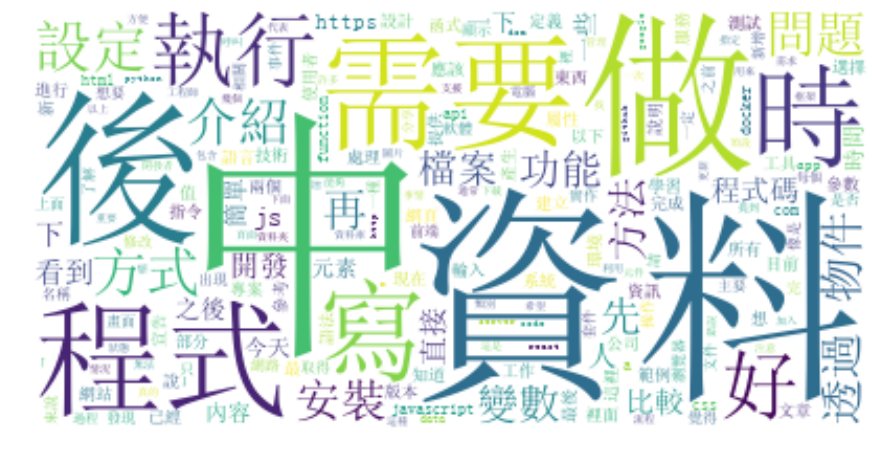

In [17]:
wordcloud = WordCloud(font_path="simsun.ttf", background_color='white')
wordcloud.generate_from_frequencies(frequencies=Counter(total_terms))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(os.path.join('day19_pic', 'worldcloud_all'), bbox_inches='tight', pad_inches=0)
plt.show()

DevOps


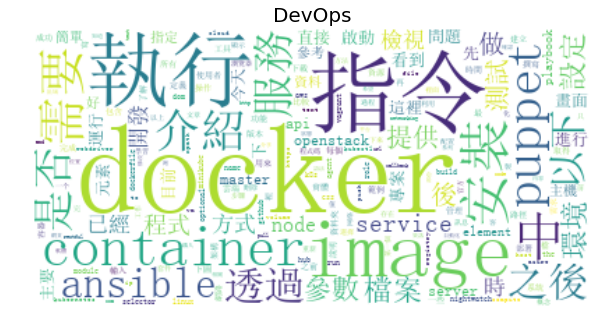

自我挑戰組


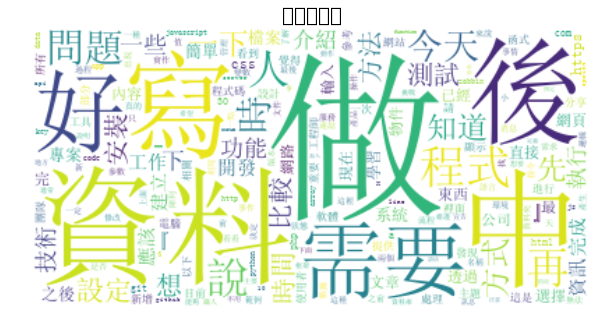

AI&MachineLearning


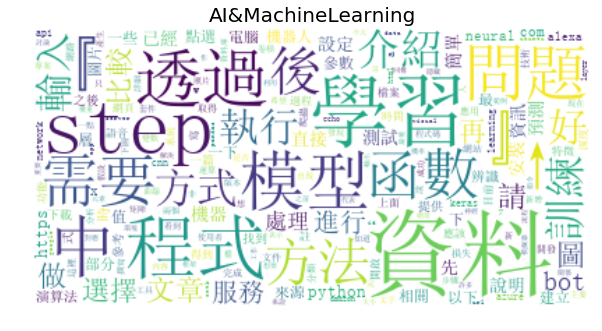

SoftwareDevelopment


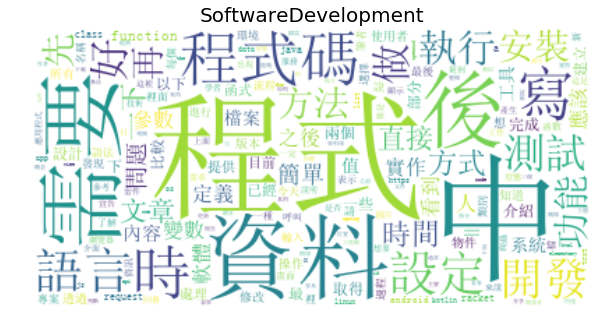

DataTechnology


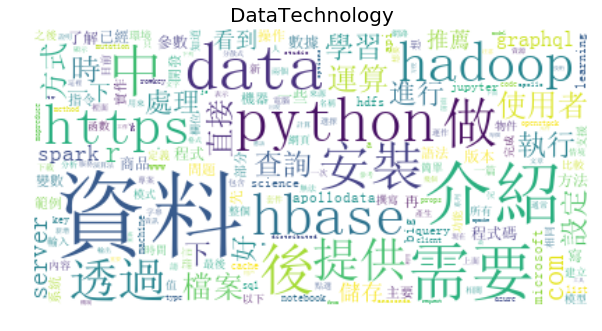

Security


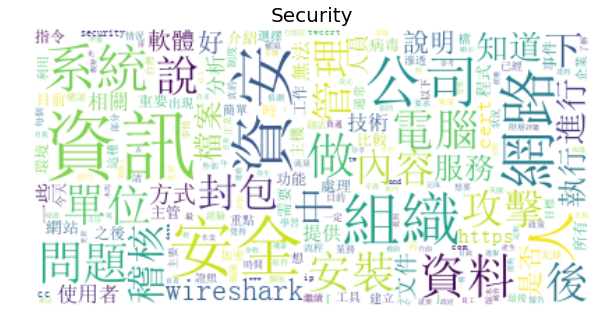

ModernWeb


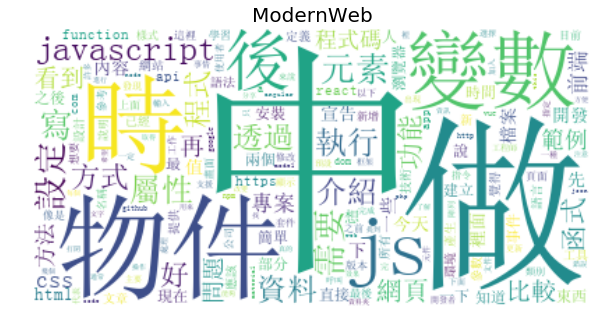

In [45]:
def tokenize(sentence):
    terms = []
    if pd.notnull(sentence):
        for term in jieba.cut(sentence):
            term = term.lower()
            if term not in stops:
                terms.append(term)
    return terms

for g in set(df['group']):
    print(g)
    df_content = df[df['group'] == g][['text_content']]
    df_content['processed'] = df_content['text_content'].apply(tokenize)
    total_terms = []
    for terms in df_content['processed']:
        total_terms.extend(terms)
        
    wordcloud = WordCloud(font_path="simsun.ttf", background_color='white')
    wordcloud.generate_from_frequencies(frequencies=Counter(total_terms))
    plt.figure(figsize=(10, 10))
    plt.title(g, fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(os.path.join('day19_pic', 'worldcloud_' + g + '_chinese'), bbox_inches='tight', pad_inches=0)
    plt.show()

DevOps


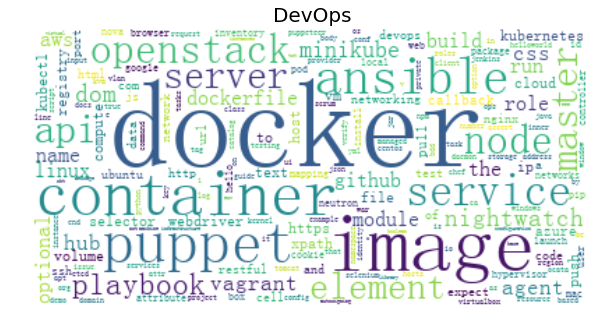

自我挑戰組


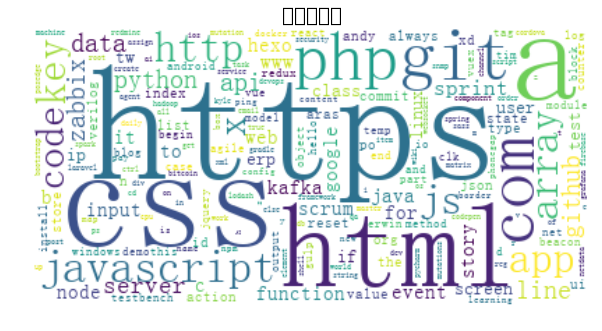

AI&MachineLearning


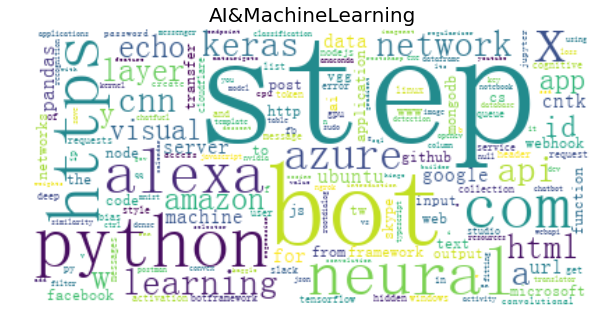

SoftwareDevelopment


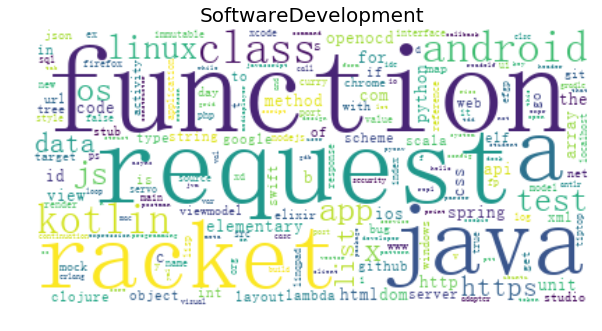

DataTechnology


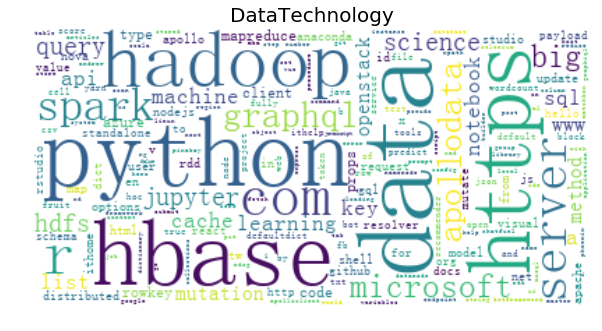

Security


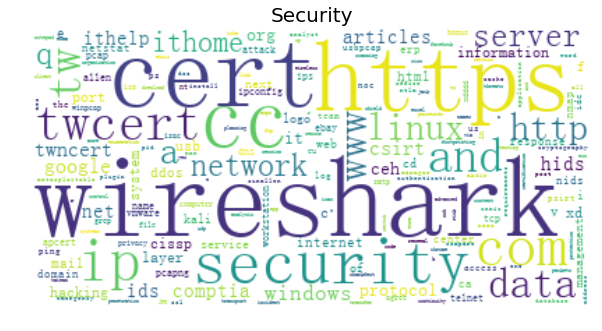

ModernWeb


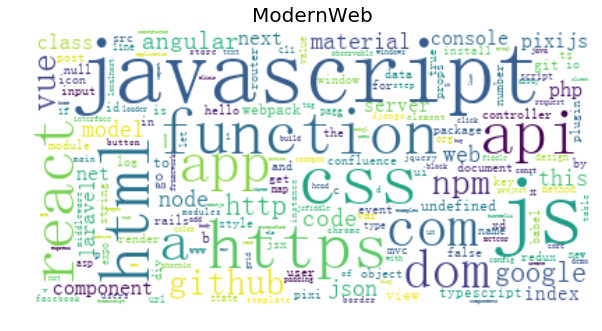

In [44]:
for g in set(df['group']):
    print(g)
    df_content = df[df['group'] == g][['text_content']]
    df_content['processed'] = df_content['text_content'].apply(tokenize)
    english_terms = []
    for terms in df_content['processed']:
        for term in terms:
            match_eng = re.match(r'[a-z]+', term)
            if match_eng != None and match_eng.group(0) == term:
                english_terms.append(term)
            
    wordcloud = WordCloud(font_path="simsun.ttf", background_color='white')
    wordcloud.generate_from_frequencies(frequencies=Counter(english_terms))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(g, fontsize=20)
    plt.savefig(os.path.join('day19_pic', 'worldcloud_' + g + '_English'), bbox_inches='tight', pad_inches=0)
    plt.show()

In [20]:
group_lang_count = {}
for g in set(df['group']):
    print(g)
    df_content = df[df['group'] == g][['text_content']]
    df_content['processed'] = df_content['text_content'].apply(tokenize)
    total_terms = []
    for terms in df_content['processed']:
        for term in terms:
            match_eng = re.match(r'[a-z]+', term)
            if match_eng != None and match_eng.group(0) == term:
                total_terms.append(term)

    langs = ["nodejs", "node", "reactjs", "react", "js", 
             "python", "javascript", "ruby", 'java', 'c', 
             'c#', 'angularjs', 'angular', 'typescript', 
             'd3', 'd3js', 'sql', 'html', 'css', 'jquery',
            'go', 'vue', 'vuejs', 'r']
    
    langs = sorted(langs)

    lang_count = {}
    for lang in langs:
        count = 0
        if lang in total_terms:
            count = Counter(total_terms).get(lang)
        lang_count[lang] = count
    
    print(lang_count)
    group_lang_count[g] = lang_count

DevOps
{'sql': 2, 'angular': 0, 'c#': 0, 'node': 67, 'd3': 0, 'html': 21, 'd3js': 0, 'jquery': 0, 'ruby': 3, 'vue': 0, 'nodejs': 6, 'vuejs': 0, 'typescript': 0, 'r': 0, 'javascript': 1, 'js': 22, 'react': 0, 'css': 41, 'java': 13, 'python': 7, 'angularjs': 0, 'go': 4, 'c': 1, 'reactjs': 0}
自我挑戰組
{'sql': 16, 'angular': 13, 'c#': 0, 'node': 49, 'd3': 0, 'html': 119, 'd3js': 0, 'jquery': 31, 'ruby': 16, 'vue': 26, 'nodejs': 3, 'vuejs': 8, 'typescript': 14, 'r': 21, 'javascript': 96, 'js': 79, 'react': 31, 'css': 144, 'java': 47, 'python': 76, 'angularjs': 2, 'go': 10, 'c': 57, 'reactjs': 0}
AI&MachineLearning
{'sql': 5, 'angular': 0, 'c#': 0, 'node': 13, 'd3': 0, 'html': 28, 'd3js': 0, 'jquery': 0, 'ruby': 0, 'vue': 0, 'nodejs': 9, 'vuejs': 0, 'typescript': 6, 'r': 5, 'javascript': 8, 'js': 14, 'react': 0, 'css': 0, 'java': 0, 'python': 59, 'angularjs': 0, 'go': 0, 'c': 3, 'reactjs': 0}
SoftwareDevelopment
{'sql': 32, 'angular': 0, 'c#': 0, 'node': 16, 'd3': 0, 'html': 78, 'd3js': 0, 'jqu

In [21]:
df_lang = pd.DataFrame(list(group_lang_count.values()), index=group_lang_count.keys())
df_lang

angular  angularjs   c  c#  css  d3  d3js   go  html  \
DevOps                     0          0   1   0   41   0     0    4    21   
Security                   0          0  11   0    0   0     0    0    10   
AI&MachineLearning         0          0   3   0    0   0     0    0    28   
自我挑戰組                     13          2  57   0  144   0     0   10   119   
SoftwareDevelopment        0          0  55   0   55   0     0   43    78   
ModernWeb                181          8  87   0  474   0     0  116   407   
DataTechnology             1          0   6   0    2   0     0    9    19   

                     java  ...    nodejs  python   r  react  reactjs  ruby  \
DevOps                 13  ...         6       7   0      0        0     3   
Security                0  ...         0       1   4      0        0     0   
AI&MachineLearning      0  ...         9      59   5      0        0     0   
自我挑戰組                  47  ...         3      76  21     31        0    16   
SoftwareDevelopment   120  ...        26      63   8      4        0    14   
ModernWeb              51  ...        18      35   4    313       22    34   
DataTechnology         12  ...        17     118  76     15        0     4   

                     sql  typescript  vue  vuejs  
DevOps                 2           0    0      0  
Security               1           0    0      0  
AI&MachineLearning     5           6    0      0  
自我挑戰組                 16          14   26      8  
SoftwareDevelopment   32           0    0      0  
ModernWeb             32         115  198      4  
DataTechnology        35           6    7      0  

[7 rows x 24 columns]

In [54]:
df_lang.to_csv()

',angular,angularjs,c,c#,css,d3,d3js,go,html,java,javascript,jquery,js,node,nodejs,python,r,react,reactjs,ruby,sql,typescript,vue,vuejs\nDevOps,0,0,1,0,41,0,0,4,21,13,1,0,22,67,6,7,0,0,0,3,2,0,0,0\nSecurity,0,0,11,0,0,0,0,0,10,0,0,0,0,1,0,1,4,0,0,0,1,0,0,0\nAI&MachineLearning,0,0,3,0,0,0,0,0,28,0,8,0,14,13,9,59,5,0,0,0,5,6,0,0\n自我挑戰組,13,2,57,0,144,0,0,10,119,47,96,31,79,49,3,76,21,31,0,16,16,14,26,8\nSoftwareDevelopment,0,0,55,0,55,0,0,43,78,120,22,4,92,16,26,63,8,4,0,14,32,0,0,0\nModernWeb,181,8,87,0,474,0,0,116,407,51,699,57,730,163,18,35,4,313,22,34,32,115,198,4\nDataTechnology,1,0,6,0,2,0,0,9,19,12,7,0,22,10,17,118,76,15,0,4,35,6,7,0\n'

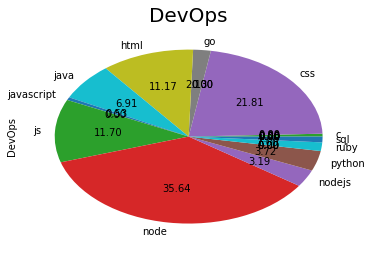

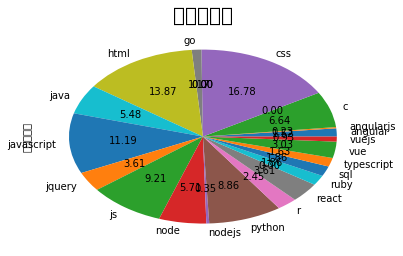

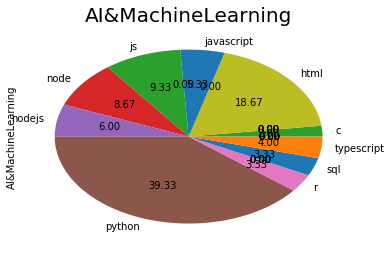

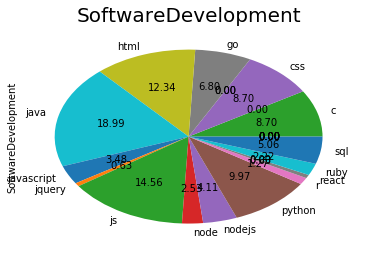

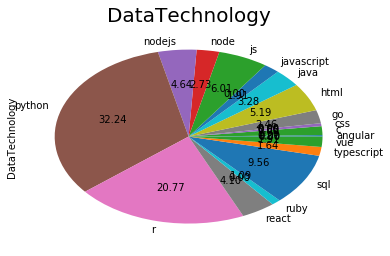

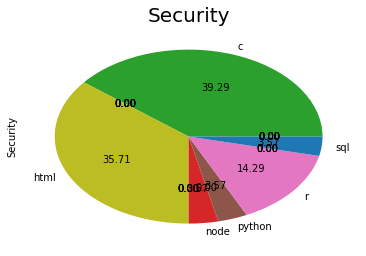

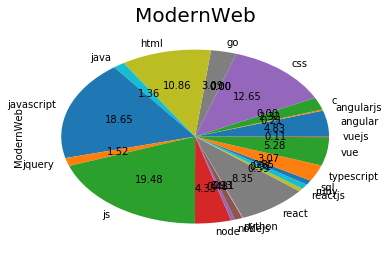

In [55]:
for g in set(df['group']):
    df_lang.T[g].plot(kind='pie', autopct='%.2f', title=g, fontsize=10, )
    plt.title(g, fontsize=20)
    plt.savefig(os.path.join('day19_pic', 'lang_pie_' + g), bbox_inches='tight', pad_inches=0)
    plt.show()

In [23]:
set(df['group'])

{'AI&MachineLearning',
 'DataTechnology',
 'DevOps',
 'ModernWeb',
 'Security',
 'SoftwareDevelopment',
 '自我挑戰組'}